In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
#17 เทรนโมเดลแบบ Simple Linear Regression และ Multiple Linear Regression
df = pd.read_csv('data.csv')

In [3]:
#Simple linear regression

X = df['sqft_living']
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 80)

In [5]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print(lm.coef_)
print(lm.intercept_)

[241.84407148]
24822.57531702076


In [7]:
y_predicted = lm.predict(X_test)
y_predicted

array([ 428702.17468358,  307780.13894509,  443212.8189722 ,
        486744.75183805,  390007.12324726,  428702.17468358,
        665709.36473102,  424107.13732551,  460141.90397558,
        641524.95758332,  365822.71609956,  290851.0539417 ,
        310198.57965986,  244900.68036107,  423865.29325404,
        520602.92184483,  421446.85253927,  567036.98356841,
        789049.84118428,  539950.44756299,  547205.7697073 ,
        281177.29108262,  288432.61322693,  912390.31763754,
        377914.91967341,  324709.22394848, 1197766.32198037,
        198950.30678045,  518184.48113006,  300524.81680078,
        310198.57965986,  474652.5482642 ,  302943.25751555,
        624595.87257993,  431120.61539835,  793886.72261382,
        585900.82114361,  346475.1903814 ,  561716.41399592,
        605248.34686177,  319872.34251894,  448049.70040174,
        934156.28407047,  356148.95324048,  934156.28407047,
        731007.2640298 ,  198950.30678045,  685056.89044918,
        929319.40264093,

In [8]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE: ', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE:  208841.16374433893
MSE:  998928477892.2942
RMSE:  999464.0953492498


In [21]:
data = [[metrics.mean_absolute_error(y_test, y_predicted),metrics.mean_squared_error(y_test, y_predicted),np.sqrt(metrics.mean_squared_error(y_test, y_predicted))]]
table_data = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['Simple LR'])
table_data

,MAE,MSE,RMSE
Simple LR,208841.163744,9.989285e+11,999464.095349


In [15]:
#Multiple linear regression
X2 = df[['sqft_living','sqft_above','bathrooms']]
y2 = df['price']
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size = 0.2, random_state = 80)

In [16]:
lm = LinearRegression()
lm.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lm.coef_)
print(lm.intercept_)

[  254.64141134   -12.0842616  -5420.49528358]
31232.532850786753


In [19]:
y_predicted2 = lm.predict(X2_test)
y_predicted2

array([ 420041.48706996,  309603.90276589,  441370.53515898,
        485531.61501132,  389743.03631926,  422751.73471175,
        660457.74145936,  420853.39650843,  454284.16417827,
        655372.72494339,  355621.50431603,  292624.90228392,
        313911.24602818,  246539.04383285,  430424.94629712,
        514923.45161389,  419540.39168216,  561494.42436444,
        785517.01164891,  549994.28618858,  556209.27218245,
        280212.36865243,  287489.0831447 ,  908893.47503934,
        379945.4761912 ,  329483.12603101, 1183242.48032562,
        200453.18538178,  527680.7722479 ,  302327.18827361,
        307964.10280063,  471547.84080461,  304752.75977104,
        619223.02600314,  439393.4574129 ,  789013.03082287,
        580413.88204435,  348413.04672468,  557530.71332583,
        611609.32029772,  321731.76025301,  442156.30669115,
        929696.17767349,  351339.71360991,  921565.43474813,
        725948.17188983,  200453.18538178,  692792.47334698,
        930352.08492246,

In [20]:
print('MAE: ', metrics.mean_absolute_error(y2_test, y_predicted2))
print('MSE: ', metrics.mean_squared_error(y2_test, y_predicted2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y2_test, y_predicted2)))

MAE:  208726.978363081
MSE:  998667928901.96
RMSE:  999333.7425014528


In [22]:
#Summary
data = [[metrics.mean_absolute_error(y2_test, y_predicted2),metrics.mean_squared_error(y2_test, y_predicted2),np.sqrt(metrics.mean_squared_error(y2_test, y_predicted2))]]
table_data2 = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['Multiple LR'])
table_data.append(table_data2)

,MAE,MSE,RMSE
Simple LR,208841.163744,9.989285e+11,999464.095349
Multiple LR,208726.978363,9.986679e+11,999333.742501


In [23]:
#19 เปรียบเทียบผลลัพธ์ที่ดีที่สุดของ Linear Regression กับ SVR ว่าโมเดลไหนมีประสิทธิภาพมากกว่า
'''
จากข้อ 16 และ 17 สรุปว่า ถ้าใช้MAEเป็นเกณฑ์ --> SVR จะมีประสิทธิภาพดีกว่า LR
แต่ถ้าใช้ MSE หรือ RMSE  -->LR จะมีประสิทธิภาพดีกว่า SVR

'''


'\nจากข้อ 16 และ 17 สรุปว่า ถ้าใช้MAEเป็นเกณฑ์ --> SVR จะมีประสิทธิภาพดีกว่า LR\nแต่ถ้าใช้ MSE หรือ RMSE  -->LR จะมีประสิทธิภาพดีกว่า SVR\n\n'

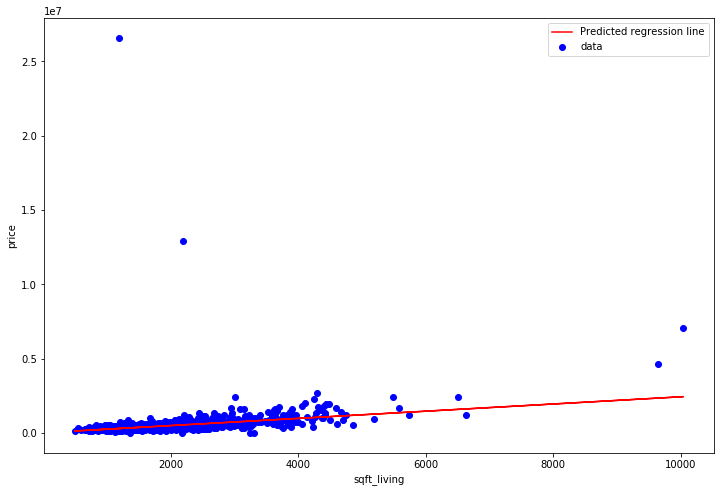

In [27]:
#20 สร้าง scatter plot และ prediction line ของ simple linear regression ที่ดีที่สุด และ SVR ( แบบ 1 dependent VS 1 independent) ที่ดีที่สุด
fig = plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test, color='blue', label='data')
plt.plot(X_test,y_predicted, color='red', label ='Predicted regression line')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# สำหรับ graph plot ของ SVR อยู่ในข้อ 14 ครับ